In [1]:
import os
from pydub import AudioSegment

In [2]:
#edit from ale's code

def partition_dataset(datapath, out, ms, hop = None):
    
    if hop is None:
        hop = ms
    cats = os.listdir(datapath)
    for cat in cats:
        dirpath = os.path.join(datapath, str(cat))
        for track in os.listdir(dirpath):
            trackpath = os.path.join(dirpath, str(track))
            audio = AudioSegment.from_file(trackpath)
            
            size = len(audio) #boh
            segments = []
            i = 0
            while(i+ms < size):
                next_segment = audio[i:i+ms]
                segments.append(next_segment)
                i = i+hop
            
            outpath = os.path.join(out, str(cat), str(track.split(".")[0]))
            
            if not os.path.isdir(outpath):
                os.makedirs(outpath)
                
            form = track.split(".")[-1]
                    
            for idx, segment in enumerate(segments):
                segment.export(os.path.join(outpath, str(str(idx) + "." + form)), format=form)


In [3]:
partition_dataset('../dataset/UtahAudioData','../dataset/segments',10000, 5000)

Now we read the dataset for tensorflow

In [1]:
import glob
from Spectrum import Spectrum 

spectres = []
labels = []

#79
records = glob.glob('../dataset/segments/concrete_mixer/ConcreteMixer_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(0.0)

#69
records = glob.glob('../dataset/segments/dozer_JD700J/JD700J_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(1.0)

#111
'''
records = glob.glob('../dataset/segments/excavator_JD50G/JD50G_onboard/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(2.0)
#44
records = glob.glob('../dataset/segments/excavator_JD50G/JD50G_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(2.0)
'''
#112
records = glob.glob('../dataset/segments/excavator_JD50G/JD50G_onsit_0/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(2.0)
'''
#237
records = glob.glob('../dataset/segments/grader_JD670G/JD670G_onboard/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(3.0)
'''
#238
records = glob.glob('../dataset/segments/grader_JD670G/JD670G_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(3.0)

In [2]:
print(len(spectres))
print(spectres[0].shape)
print(len(labels))

318
(128, 44, 2)
318


In [3]:
import pickle

'''
with open('dataset','wb') as out:
    pickle.dump(dataset, out)
'''

"\nwith open('dataset','wb') as out:\n    pickle.dump(dataset, out)\n"

In [4]:
import pickle
with open('dataset','rb') as inp:
    dataset = pickle.load(inp)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset'

In [3]:
import random
dataset = (spectres, labels)
X, Y = dataset
new_dataset = [x for x in zip(X,Y)]
random.shuffle(new_dataset)
print(new_dataset[0])
X = []
Y = []
for x, y in new_dataset:
    X.append(x)
    Y.append(y)

(array([[[-48.7783548 ,   0.86872766],
        [-49.87060938,   0.86872766],
        [-43.58884139,   0.86872766],
        ...,
        [-45.69114542,   0.56034375],
        [-44.58572146,   0.56034375],
        [-30.03267548,   0.56034375]],

       [[-50.93401977,   1.14042228],
        [-47.37927485,   1.14042228],
        [-44.86669406,   1.14042228],
        ...,
        [-49.06216535,   0.76234978],
        [-39.75869086,   0.76234978],
        [-31.3919956 ,   0.76234978]],

       [[-46.49462784,   0.86838532],
        [-48.41102602,   0.86838532],
        [-45.12534103,   0.86838532],
        ...,
        [-40.88652048,   1.31592491],
        [-41.36283774,   1.31592491],
        [-29.70375129,   1.31592491]],

       ...,

       [[-41.84264577,  -2.0135837 ],
        [-69.23888409,  -2.0135837 ],
        [-68.83649401,  -2.0135837 ],
        ...,
        [-69.46690399,   1.6760407 ],
        [-73.01733435,   1.6760407 ],
        [-40.69177175,   1.6760407 ]],

       [[-41.8

In [4]:
print(X[0])
print(Y[0])

[[[-48.7783548    0.86872766]
  [-49.87060938   0.86872766]
  [-43.58884139   0.86872766]
  ...
  [-45.69114542   0.56034375]
  [-44.58572146   0.56034375]
  [-30.03267548   0.56034375]]

 [[-50.93401977   1.14042228]
  [-47.37927485   1.14042228]
  [-44.86669406   1.14042228]
  ...
  [-49.06216535   0.76234978]
  [-39.75869086   0.76234978]
  [-31.3919956    0.76234978]]

 [[-46.49462784   0.86838532]
  [-48.41102602   0.86838532]
  [-45.12534103   0.86838532]
  ...
  [-40.88652048   1.31592491]
  [-41.36283774   1.31592491]
  [-29.70375129   1.31592491]]

 ...

 [[-41.84264577  -2.0135837 ]
  [-69.23888409  -2.0135837 ]
  [-68.83649401  -2.0135837 ]
  ...
  [-69.46690399   1.6760407 ]
  [-73.01733435   1.6760407 ]
  [-40.69177175   1.6760407 ]]

 [[-41.83740117  -2.50671032]
  [-79.94687317  -2.50671032]
  [-78.87690562  -2.50671032]
  ...
  [-77.51007655   2.67309667]
  [-80.           2.67309667]
  [-40.90677167   2.67309667]]

 [[-42.07562313  -2.51454568]
  [-80.          -2.5145

In [5]:
import numpy as np
X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.int32)
data_size = len(X)
split_size = int(0.7*data_size)
xtrain = X[:split_size]
ytrain = Y[:split_size]
Xtest = X[split_size:]
Ytest = Y[split_size:]

In [6]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [7]:
Xtrain = tf.convert_to_tensor(xtrain, dtype=tf.float32)
ytrain = tf.convert_to_tensor(ytrain, dtype=tf.float32)
Xtest = tf.convert_to_tensor(Xtest, dtype=tf.float32)
ytest = tf.convert_to_tensor(Ytest, dtype=tf.float32)
train_it = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_it = tf.data.Dataset.from_tensor_slices((Xtest, Ytest))

In [8]:
def _parse_example(x, y):
    #x = tf.cast(tf.reshape(x, (244, 341, 4)), tf.float32) / tf.constant(255.0)
    x = tf.cast(x, tf.float32)
    y = tf.cast(y, tf.int32)
    return x, y
train_it = train_it.map(_parse_example)
test_it = test_it.map(_parse_example)

In [9]:
class SpectroCNN(tf.keras.Model):
  
    def __init__(self):
        super(SpectroCNN, self).__init__()
    
        self.conv1 = tf.layers.Conv2D(filters=24,
                                      kernel_size=[6, 6],
                                      strides = (1,1),
                                      kernel_initializer = tf.initializers.glorot_uniform,
                                      padding="same",
                                      activation=tf.nn.relu)
        self.conv2 = tf.layers.Conv2D(filters=24,
                                      kernel_size=[6, 6],
                                      strides = (1,1),
                                      kernel_initializer = tf.initializers.glorot_uniform,
                                      padding="same",
                                      activation=tf.nn.relu)
        self.conv3 = tf.layers.Conv2D(filters=48,
                                      kernel_size=[5, 5],
                                      strides = (2,2),
                                      kernel_initializer = tf.initializers.glorot_uniform,
                                      padding="same",
                                      activation=tf.nn.relu)
        self.conv4 = tf.layers.Conv2D(filters=48,
                                      kernel_size=[5, 5],
                                      strides = (2,2),
                                      kernel_initializer = tf.initializers.glorot_uniform,
                                      padding="same",
                                      activation=tf.nn.relu)
        self.conv5 = tf.layers.Conv2D(filters=64,
                                      kernel_size=[4, 4],
                                      strides = (2,2),
                                      kernel_initializer = tf.initializers.glorot_uniform,
                                      padding="same",
                                      activation=tf.nn.relu)

        self.dense = tf.layers.Dense(200, activation=tf.nn.relu)
        self.dropout = tf.layers.Dropout(0.3) #to be improved
    
        self.logits = tf.layers.Dense(units=4, activation=tf.nn.softmax)
    
    def call(self, x, training=False):
    
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.dense(tf.reshape(x, [-1, 16*6*64])) #this is not so correct
        x = self.dropout(x, training=training)

        return self.logits(x)

In [10]:
cnn = SpectroCNN()
def loss(net, x, y):
    return tf.losses.sparse_softmax_cross_entropy(logits=net(x, training=True), labels=y)

opt = tf.train.AdamOptimizer()

Train accuracy at epoch 0 is 37.83783783783784 %
Test accuracy at epoch 0 is 32.29166666666667 %
Loss value at epoch 0 is 1.3603742122650146
Train accuracy at epoch 1 is 35.585585585585584 %
Test accuracy at epoch 1 is 34.375 %
Loss value at epoch 1 is 1.3612715005874634
Train accuracy at epoch 2 is 49.0990990990991 %
Test accuracy at epoch 2 is 54.166666666666664 %
Loss value at epoch 2 is 1.2734936475753784
Train accuracy at epoch 3 is 83.33333333333334 %
Test accuracy at epoch 3 is 82.29166666666666 %
Loss value at epoch 3 is 0.8888251185417175
Train accuracy at epoch 4 is 98.1981981981982 %
Test accuracy at epoch 4 is 95.83333333333334 %
Loss value at epoch 4 is 0.7459813356399536
Train accuracy at epoch 5 is 98.1981981981982 %
Test accuracy at epoch 5 is 96.875 %
Loss value at epoch 5 is 0.7545919418334961
Train accuracy at epoch 6 is 98.64864864864865 %
Test accuracy at epoch 6 is 98.95833333333334 %
Loss value at epoch 6 is 0.7542596459388733
Train accuracy at epoch 7 is 94.5945

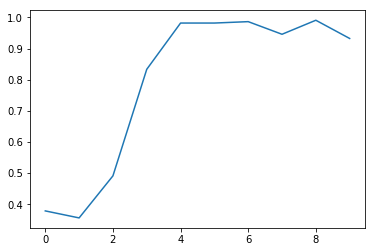

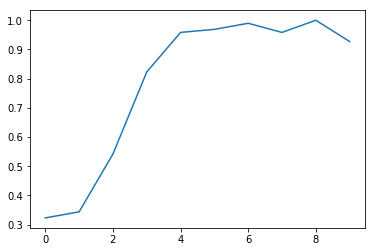

[[26  0  0  0]
 [ 0 15  0  0]
 [ 0  0 25  0]
 [ 1  6  2 21]]
[3 0 0 2 0 1 3 0 0 1 3 1 0 2 1 0 3 0 2 2 2 0 2 3 0 1 1 3 2 3 2 2 1 1 2 0 0
 2 1 1 3 0 2 2 3 1 1 1 2 0 0 3 0 0 2 0 3 3 3 2 3 1 2 1 1 1 2 1 1 2 3 3 0 0
 2 0 3 3 0 3 2 0 0 2 2 1 2 0 0 2 3 3 2 1 0 2]
[3 0 0 2 0 1 3 0 0 1 3 1 0 2 3 0 3 0 2 3 2 0 3 3 0 3 1 3 2 3 2 2 3 3 2 0 0
 2 1 1 3 0 2 2 3 1 1 1 2 0 0 3 3 0 2 0 3 3 3 2 3 3 2 3 1 1 2 1 1 2 3 3 0 0
 2 0 3 3 0 3 2 0 0 2 2 1 2 0 0 2 3 3 2 1 0 2]


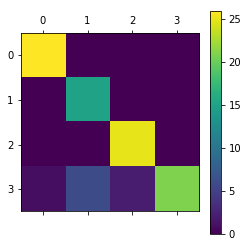

In [11]:
import matplotlib.pyplot as plt

epochs = 10
trainAccuracy = np.zeros(epochs)
testAccuracy = np.zeros(epochs)
lossValue = 0.0

for epoch in range(epochs):
  
    accTrain = tfe.metrics.SparseAccuracy()
    for xb, yb in train_it.batch(16):
        ypred = cnn(xb)
        accTrain(predictions=ypred, labels=yb)
        lossValue = tf.losses.sparse_softmax_cross_entropy(yb, ypred)

    accTest = tfe.metrics.SparseAccuracy()
    for xb, yb in test_it.batch(16):
        #print("test")
        #print(xb, yb)
        ypred = cnn(xb)
        accTest(predictions=ypred, labels=yb)
    
    trainAccuracy[epoch] = accTrain.result().numpy()
    testAccuracy[epoch] = accTest.result().numpy()
    print('==================================')
    print('Train accuracy at epoch {} is {} %'.format(epoch, trainAccuracy[epoch] * 100))
    print('Test accuracy at epoch {} is {} %'.format(epoch, testAccuracy[epoch] * 100))
    print('Loss value at epoch {} is {}'.format(epoch, lossValue))
  
    for xb, yb in train_it.shuffle(1000).batch(16):
        opt.minimize(lambda: loss(cnn, xb, yb))

plt.plot(trainAccuracy)
plt.show()
plt.plot(testAccuracy)
plt.show()

pred = []
true = []

for xb, yb in test_it.batch(16):
    ypred = cnn(xb)
    to_append = [tf.argmax(x) for x in ypred]
    pred = pred + to_append
    true_append = [x for x in yb]
    true = true + true_append

cf = tf.confusion_matrix(labels=true, predictions=pred)
cf = np.array(cf)

print(cf)

plt.matshow(cf)
plt.colorbar()

print(np.array(pred))
print(np.array(true))